In [18]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

In [19]:
method_palette = { "LoFreq": "#9593D9",
                   "ShoRAH": "#ffe66d",
                   "CliqueSNV":  "#4ecdc4",
                   "VILOCA": "#ff6b6b",
                   "ground_truth": "grey",}


method_palette = {
    'viloca_alpha_0.00001':  "#ff6b6b", 
    'viloca_envp':  "#ff6b6b",  
    'viloca_envp_0.001':  "#ff6b6b", 
    'viloca_uniform':  "#ff6b6b", 
    'viloca_learn_error_params':  "#ff6b6b", 
}

In [20]:
fname_viloca_posterior = "results/varyvilocaparams/performance_measures/performance_mutation_calls_posterior_thres.csv"
fname_local = "results/varyvilocaparams/performance_measures/local/performance.csv"
fname_runtime =  "results/varyvilocaparams/performance_measures/local/runtime.csv"

In [21]:
df_local = pd.read_csv(fname_local).drop(columns=["Unnamed: 0"])
df_local = df_local[(~df_local['method'].str.startswith("viloca")) | (~df_local['method'].str.startswith("shorah"))]
df_local = df_local.pivot(index=['method', 'params', 'replicate'], columns='variable', values='value').reset_index()

In [22]:
df_viloca = pd.read_csv(fname_viloca_posterior).drop(columns=["Unnamed: 0"])

df_viloca = df_viloca[df_viloca['posterior_threshold'].isin([0.0,0.5, 0.9])]

In [23]:
df_viloca['method'].unique()

array(['viloca_alpha_0.00001', 'viloca_envp', 'viloca_envp_0.001',
       'shorah_default', 'viloca_uniform', 'viloca_learn_error_params'],
      dtype=object)

In [24]:
df = pd.concat([df_viloca, df_local])

# give other methods also a postiro_threshold vaues such that they apppear in plotting
df['posterior_threshold'] = df['posterior_threshold'].fillna(0.9)

#df["Method"] = df['method'].apply(lambda x: mapping_methods[x])

## snv performance

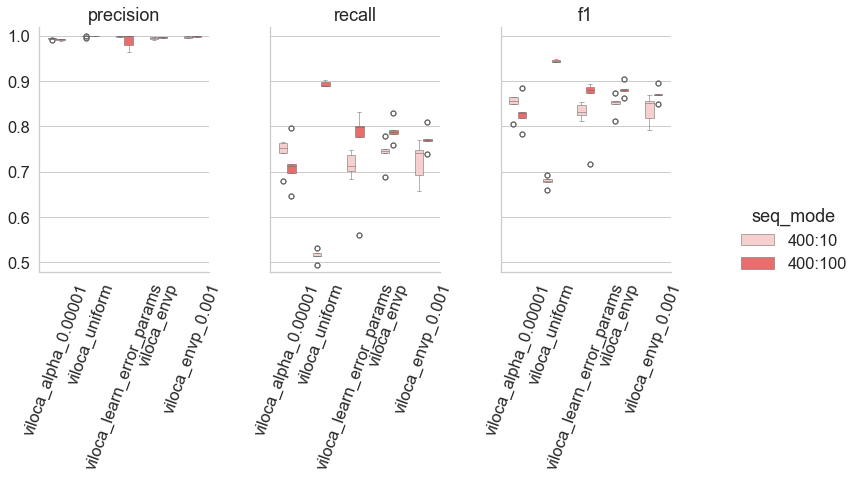

In [25]:
sns.set_theme(style="whitegrid", font_scale=1.5)

df = pd.concat([df_viloca, df_local])

# give other methods also a postiro_threshold vaues such that they apppear in plotting
df['posterior_threshold'] = df['posterior_threshold'].fillna(0.9)
df_long = df[df['posterior_threshold']>=0.9]
df_long = df_long.drop(columns=['posterior_threshold'])
df_long = pd.melt(df_long, id_vars=[
                                    "method",
                                    "params", 
                                    "replicate", 
                                    ]).assign(
        params=lambda x: x["params"].str.replace("_", "\n")
    )

df_long['seq_mode'] = df_long['params'].str.split("param~").str[1].str.split('\n').str[0]
df_long = df_long[df_long['method'].isin(['viloca_alpha_0.00001', 
                                                    'viloca_envp', 
                                                    'viloca_envp_0.001', 
                                                    'viloca_uniform', 
                                                    'viloca_learn_error_params'])]

method_order  = ['viloca_alpha_0.00001', 'viloca_uniform', 'viloca_learn_error_params', 
                 'viloca_envp', 'viloca_envp_0.001']

g = sns.catplot(
        data=df_long,
        x="method",
        y="value",
        col='variable',
        order = method_order, 
        hue="seq_mode",
        kind="box",
        legend=True, 
        width=0.5,
        height=7,
        aspect=0.5,
        linewidth=0.5,
        sharex=True,
        margin_titles=True,
        palette=['#ffc8c8', '#ff5858'],
    )
g.set_titles(col_template='{col_name}')
g.set(ylim=(0.48, 1.02))
g.set(xlabel ="")
g.set(ylabel ="")
g.set_xticklabels(rotation=70)
#g.add_legend(fontsize=20)
g.tight_layout()

g.fig.savefig("varyvilocaparams__snvs.svg")

In [35]:
df_long[(df_long['method']=='viloca_alpha_0.00001') 
        & (df_long['variable']=='recall')]['value'].mean()

0.7275751660352924

In [36]:
df_long[(df_long['method']=='viloca_learn_error_params') 
        & (df_long['variable']=='recall')]['value'].mean()

0.7349290953297077

In [37]:
df_long[(df_long['method']=='viloca_alpha_0.00001') 
        & (df_long['seq_mode']=='400:100')
        & (df_long['variable']=='recall')]['value'].mean()

0.714583393335505

In [38]:
df_long[(df_long['method']=='viloca_uniform') 
        & (df_long['seq_mode']=='400:100')
        & (df_long['variable']=='recall')]['value'].mean()

0.8936451151187216

In [39]:
df_long[(df_long['method']=='viloca_alpha_0.00001') 
        & (df_long['seq_mode']=='400:10')
        & (df_long['variable']=='recall')]['value'].mean()

0.7405669387350798

In [40]:
df_long[(df_long['method']=='viloca_uniform') 
        & (df_long['seq_mode']=='400:10')
        & (df_long['variable']=='recall')]['value'].mean()

0.5144389299421755

## Runtime comparision

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_1720/1974663772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_1720/1974663772.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(
/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_1720/1974663772.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels([datetime.timedelta(seconds=ti) for ti in ticks])


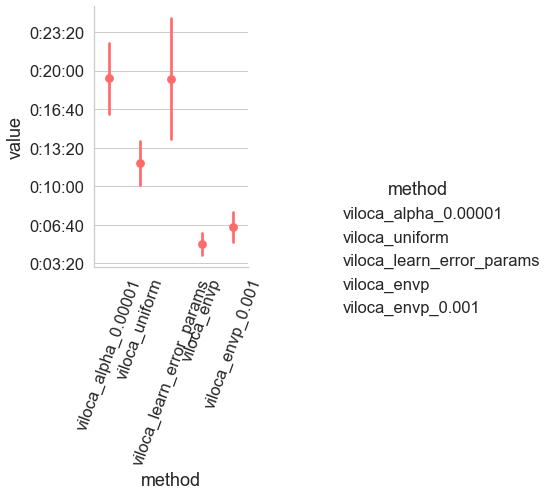

In [11]:
# runtime 
df = pd.read_csv(fname_runtime)

df = df[df['method'].isin(method_order)]

g = sns.catplot(
        data=df,
        x="method",
        order = method_order,
        y="value",
        kind="point",
        linestyles='', 
        margin_titles=True,
        height=7,
        aspect=0.6,
        errorbar='sd',
        palette=["#ff6b6b"]
    )

# set your date formatter whit this format '%H:%M'
#formatter = time.strftime('%H:%M:%S', time.gmtime)
#g.ax.yaxis.set_major_formatter(formatter)
ticks = g.ax.get_yticks()
#g.ax.set_yticklabels(pd.to_datetime(ticks, unit='s').strftime('%H:%M:%S'))

import datetime
#str(datetime.timedelta(seconds=666))
g.ax.set_yticklabels([datetime.timedelta(seconds=ti) for ti in ticks])

g.set_xticklabels(rotation=70)

g.tight_layout()
g.savefig('varyvilocaparams__runtime.svg')

In [129]:
df[df['method']=='viloca_alpha_0.00001']['value'].mean()/60

19.356262333333333

In [130]:
df[df['method']=='viloca_envp_0.001']['value'].mean()/60

6.511947666666667

In [131]:
df[df['method']=='viloca_envp']['value'].mean()/60

5.041774666666667